## Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def load_and_explore_data():
    # Load dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
    df = pd.read_csv(url)

    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print("\nClass distribution:")
    print(df['status'].value_counts())

    return df

In [ ]:
def preprocess_data(df):
    # Separate features and target
    X = df.drop(['name', 'status'], axis=1)
    y = df['status']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, X.columns

In [ ]:
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Initialize and train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print("\nModel Performance:")
    print(classification_report(y_test, y_pred))

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("\nCross-validation scores:", cv_scores)
    print(f"Average CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    return model, y_pred

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_feature_importance(model, feature_names):
    # Get feature importance
    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Plot top 10 features
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importances.head(10), x='importance', y='feature')
    plt.title('Top 10 Most Important Features')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    return importances

In [ ]:
import pandas as pd
import requests
from io import StringIO

# Funzione per scaricare e caricare un dataset da un URL
def load_dataset(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        data = StringIO(response.text)
        df = pd.read_csv(data)
        print(f"{filename} caricato con successo.")
        return df
    else:
        print(f"Errore nel caricamento di {filename}.")
        return None

# 1. Parkinson’s Disease Dataset (UCI)
url_uci = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df_uci = load_dataset(url_uci, "parkinsons.data")

# 2. Parkinson’s Telemonitoring Dataset (UCI)
url_tele = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
df_tele = load_dataset(url_tele, "parkinsons_updrs.data")

# 3. Parkinson Speech Dataset with Multiple Types of Sound Recordings (UCI)
# Nota: Questo dataset potrebbe richiedere un trattamento speciale a causa del formato dei file.
# Esempio di caricamento:
url_speech_train = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons_speech/parkinsons_speech_train_data.txt"
df_speech_train = load_dataset(url_speech_train, "parkinsons_speech_train_data.txt")

url_speech_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons_speech/parkinsons_speech_test_data.txt"
df_speech_test = load_dataset(url_speech_test, "parkinsons_speech_test_data.txt")

# Unione dei dataset di training e test
if df_speech_train is not None and df_speech_test is not None:
    df_speech = pd.concat([df_speech_train, df_speech_test], ignore_index=True)
    print("Dataset speech unito con successo.")
else:
    df_speech = None


parkinsons.data caricato con successo.
parkinsons_updrs.data caricato con successo.
Errore nel caricamento di parkinsons_speech_train_data.txt.
Errore nel caricamento di parkinsons_speech_test_data.txt.


Dataset loaded successfully!
Dataset shape: (195, 24)

Class distribution:
status
1    147
0     48
Name: count, dtype: int64

Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


Cross-validation scores: [0.96875    0.90322581 0.90322581 0.90322581 0.83870968]
Average CV Score: 0.903 (+/- 0.082)

Plotting confusion matrix...


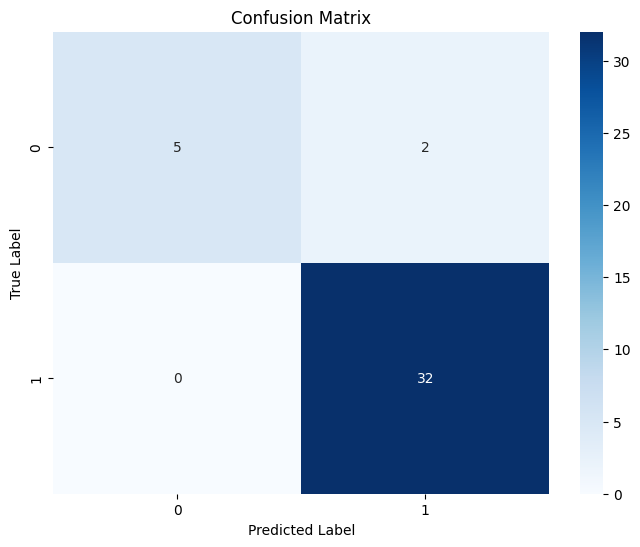


Plotting feature importance...


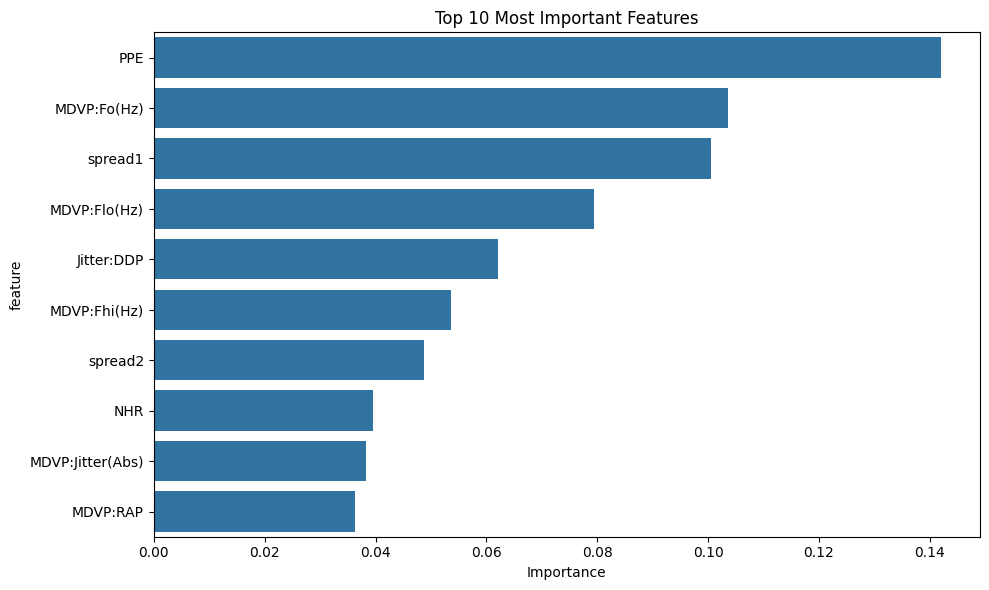


Top 5 most important features:
         feature  importance
21           PPE    0.141948
0    MDVP:Fo(Hz)    0.103600
18       spread1    0.100603
2   MDVP:Flo(Hz)    0.079445
7     Jitter:DDP    0.062098


In [ ]:
# Load and explore data
df = load_and_explore_data()

# Preprocess data
X_train_scaled, X_test_scaled, y_train, y_test, feature_names = preprocess_data(df)

# Train and evaluate model
model, y_pred = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)

# Plot results
print("\nPlotting confusion matrix...")
plot_confusion_matrix(y_test, y_pred)

print("\nPlotting feature importance...")
feature_importance = plot_feature_importance(model, feature_names)

# Print top 5 most important features
print("\nTop 5 most important features:")
print(feature_importance.head())

In [ ]:
# CELL 1 - Required imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import joblib

# CELL 2 - Create and save sklearn model
def train_sklearn_model():
    # Load data
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
    df = pd.read_csv(url)

    # Prepare data
    X = df.drop(['name', 'status'], axis=1)
    y = df['status']

    # Create and fit pipeline
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_scaled, y)

    # Save components
    joblib.dump(scaler, 'scaler.joblib')
    joblib.dump(model, 'rf_model.joblib')
    joblib.dump(list(X.columns), 'feature_names.joblib')

    return scaler, model, list(X.columns)

# CELL 3 - Create TensorFlow model
def create_tf_model(feature_count):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(feature_count,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# CELL 4 - Transfer sklearn predictions to tensorflow model
def transfer_to_tf_model(sklearn_model, scaler, feature_names):
    # Create sample data
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
    df = pd.read_csv(url)
    X = df.drop(['name', 'status'], axis=1)
    y = df['status']

    # Scale data
    X_scaled = scaler.transform(X)

    # Get predictions from sklearn model
    y_pred = sklearn_model.predict_proba(X_scaled)

    # Create and train TF model
    tf_model = create_tf_model(len(feature_names))
    tf_model.fit(X_scaled, y, epochs=10, verbose=0)  # Train briefly to initialize

    # Save the TF model
    tf_model.save('parkinsons_model.h5')

    # Convert to TFLite
    converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
    tflite_model = converter.convert()

    # Save TFLite model
    with open('parkinsons_model.tflite', 'wb') as f:
        f.write(tflite_model)

    return tf_model

# CELL 5 - Main execution
print("Training sklearn model...")
scaler, sklearn_model, feature_names = train_sklearn_model()

print("Converting to TensorFlow Lite...")
tf_model = transfer_to_tf_model(sklearn_model, scaler, feature_names)

print("Model conversion completed successfully!")

# CELL 6 - Test the TFLite model
def test_tflite_model():
    # Load and prepare test data
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
    df = pd.read_csv(url)
    X = df.drop(['name', 'status'], axis=1)[:1]  # Take first sample
    X_scaled = scaler.transform(X)

    # Load TFLite model
    interpreter = tf.lite.Interpreter(model_path="parkinsons_model.tflite")
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Test prediction
    input_data = X_scaled.astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], [input_data[0]])
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])

    print("\nTest prediction successful!")
    print("Output shape:", output_data.shape)
    print("Prediction probabilities:", output_data[0])

# Test the converted model
test_tflite_model()

Training sklearn model...
Converting to TensorFlow Lite...


Saved artifact at '/tmp/tmp2dkmlpot'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 22), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  140528048893072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140528048894416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140528048892496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140528048884816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140528048882896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140528048881936: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model conversion completed successfully!

Test prediction successful!
Output shape: (1, 2)
Prediction probabilities: [0.00475778 0.99524224]
